# <span style = "color:DarkMagenta;font-size:40px"> Fashion MNIST </span>

***

## About the dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

<b>Labels</b>
 * 0 - T-shirt/top
 * 1 - Trouser
 * 2 - Pullover
 * 3 - Dress
 * 4 - Coat
 * 5 - Sandal
 * 6 - Shirt
 * 7 - Sneaker
 * 8 - Bag
 * 9 - Ankle Boot

## Let's Get Started

### Import all necessary libraries

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras.datasets import mnist


### Read 'fashion_mnist.csv' and store it in a dataframe

In [42]:
df=pd.read_csv('fashion_mnist.csv')

### View the dataset

In [43]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the columns in the dataset

In [44]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

### Check the shape of the dataset

In [45]:
df.shape

(60000, 785)

### Split the dataset into X and y(Input and Target Variables)

In [46]:
X=df.drop('label',axis=1)
y=df['label']

### Check the shape of X

In [47]:
X.shape

(60000, 784)

### Check the shape of y

In [11]:
y.shape

(60000,)

### Reshape X to (len(X), 28,28,1)

In [48]:
X=X.values.reshape(-1,28,28,1)

### Check the shape of X

In [49]:
X.shape

(60000, 28, 28, 1)

### Normalise the data

In [50]:
X=X/255

In [51]:
X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

### Plot some of the figures

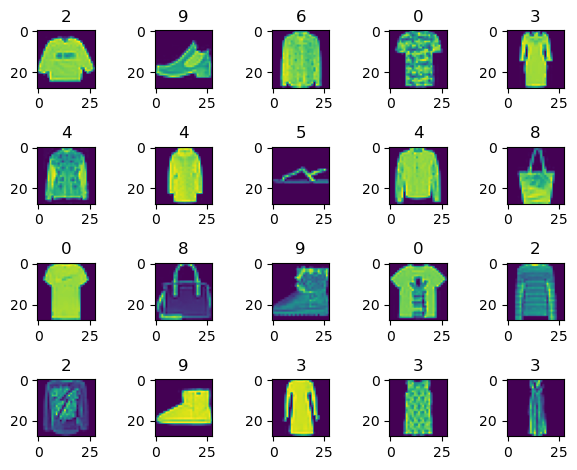

In [60]:
for i in range(20): 
    plt.subplot(4,5,i+1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.tight_layout()

### Split the dataset into Training and Testing set

In [62]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

### Check the shape of X_train and X_test

In [76]:
X_train.shape

(48000, 28, 28, 1)

In [77]:
X_test.shape

(12000, 28, 28, 1)

### Create a keras Sequential model with 2 hidden layers

In [78]:
from keras.layers import Input,Flatten,Dense
from keras.models import Sequential
from tensorflow.keras import layers

In [86]:
model=Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')

])

C:\Users\erinr\anaconda3\New folder\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile Keras Model

In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Check summary of the model

In [88]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [103]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9077 - loss: 0.2375 - val_accuracy: 0.8721 - val_loss: 0.3761
Epoch 2/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9130 - loss: 0.2319 - val_accuracy: 0.8808 - val_loss: 0.3484
Epoch 3/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9150 - loss: 0.2214 - val_accuracy: 0.8783 - val_loss: 0.3559
Epoch 4/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9175 - loss: 0.2153 - val_accuracy: 0.8846 - val_loss: 0.3625
Epoch 5/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9219 - loss: 0.2060 - val_accuracy: 0.8863 - val_loss: 0.3854
Epoch 6/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9255 - loss: 0.1971 - val_accuracy: 0.8854 - val_loss: 0.3699
Epoch 7/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9273 - loss: 0.1908 - val_accuracy: 0.8867 - val_loss: 0.3796
Epoch 8/10
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9279 - loss: 0.1866 - 

### Evaluate the model

In [104]:
model.evaluate(X_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.3700


[0.3901103138923645, 0.8829166889190674]

### Make predictions

In [105]:
y_pred=model.predict(X_test)
y_pred

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.9007406e-01, 4.8025779e-02, 1.6530168e-01, ..., 3.4949767e-06,
        3.2025364e-03, 5.7733960e-06],
       [7.0089303e-02, 9.9284415e-13, 3.5139237e-05, ..., 1.1097401e-05,
        9.9999982e-01, 1.4648708e-08],
       [1.3535279e-13, 3.7557995e-06, 1.5731159e-11, ..., 9.6137661e-01,
        3.2391893e-12, 1.0000000e+00],
       ...,
       [9.5667092e-05, 5.0545874e-04, 1.2169129e-03, ..., 9.9850023e-01,
        4.5961933e-06, 6.0326491e-02],
       [2.2807855e-08, 7.4201946e-20, 9.2603790e-25, ..., 3.1786468e-12,
        2.9496802e-13, 3.5976509e-15],
       [1.7363190e-03, 1.3726244e-08, 4.8589504e-01, ..., 2.3084420e-11,
        1.1335637e-07, 1.2143752e-06]], dtype=float32)

### Create a dictionary with Key from 0 to 1 and values of labels

In [106]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

print(label_dict)


{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}


### Store all predicted values as numbers in a list

In [114]:
predicted_labels = np.argmax(y_pred, axis=1) 
predicted_list = predicted_labels.tolist()

### Plot the first few figures in X_test along with its labels from y_test

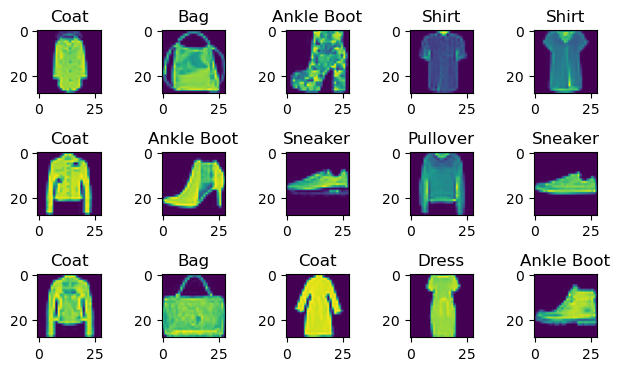

In [134]:
y_test.reset_index(drop = True, inplace = True)
for i in range(15): 
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[y_test[i]])
    plt.tight_layout()

In [85]:
y_test.reset_index(drop = True, inplace = True)

### Now plot the figures from X-test with labels from our Predicted values

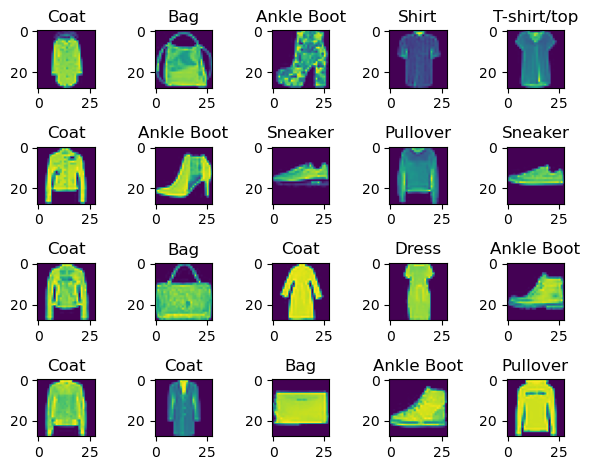

In [189]:
for i in range(20): 
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[predicted_list[i]])
    plt.tight_layout()

### Plot the accuracy of our prediction

In [162]:
y_test.shape

(12000,)

In [160]:
X_test.shape

(12000, 28, 28, 1)

In [159]:
predicted_labels.shape

(12000,)

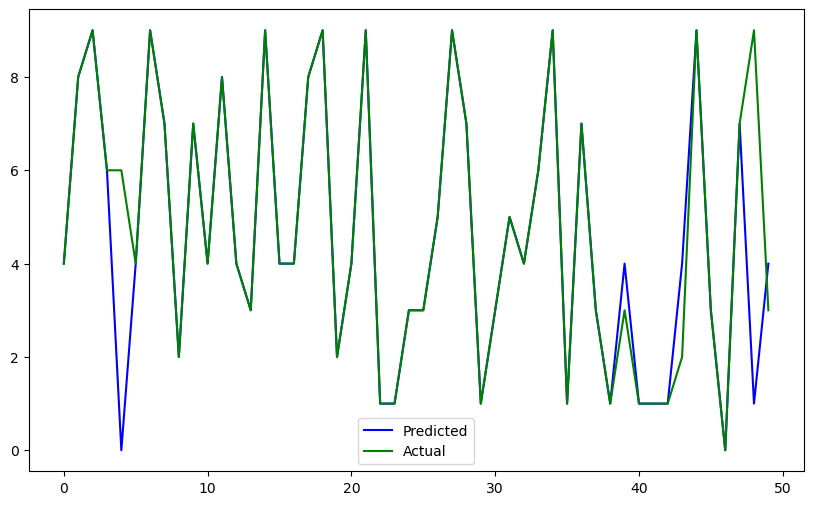

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(predicted_labels[:50], label='Predicted', color='blue')
plt.plot(y_test[:50], label='Actual', color='green')
plt.legend()
plt.show()

### Plot confusion matrix on a heatmap

In [181]:
from sklearn import metrics

<Axes: >

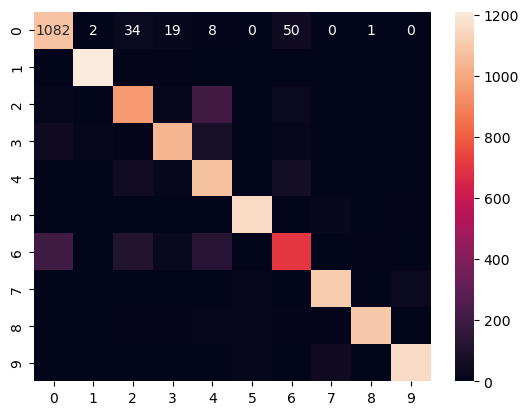

In [188]:
sns.heatmap(metrics.confusion_matrix(y_test,predicted_labels),annot=True , fmt="d")

***

# <span style = "color:green; font-size:40px"> Excellent Work!</span>